Antes que nada tenemos que conocer el problema y entender de qué tipo se trata.<br><br>
En este caso estamos hablando de un problema de clasificación, por lo que vamos a utilizar un modelo clasificador.<br><br>
Vamos a utilizar un arbol de decisión. Me parece un modelo más que adecuado, ya que en base a identificar patrones es muy bueno para advertir valores de tipo numérico.

In [124]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_score
from sklearn import tree
from sklearn.model_selection import train_test_split

In [125]:
df = pd.read_csv('C:/Users/AMD/Desktop/Proyectos_individuales/DATA05PI02/datasets/hospitalizaciones_train.csv')

In [140]:
df_copy = df.copy()

In [ ]:
df_copy['Stay (in days)'].loc[df_copy['Stay (in days)'] <= 8] = 0
df_copy['Stay (in days)'].loc[df_copy['Stay (in days)'] > 8] = 1
y = df_copy['Stay (in days)']
y.unique()

Hasta acá leímos el CSV, guardamos una copia del DF e intercambiamos valores de Stay in days a 0-1
(Long stay, short stay).
Hasta 8 días se cambio por el valor de 0, y más de 8 días se cambia a 1.

In [142]:
df_copy.columns

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit',
       'Stay (in days)'],
      dtype='object')

Revisamos las columnas e inferimos a simple vista que hay por lo menos 2 que no nos sirven;

patientid (Identificador del paciente).

Stay in days (que ya hemos guardado como variable y para nuestro modelo).

In [143]:
df_copy.drop(columns=['patientid', 'Stay (in days)'], inplace=True)

Para cada una de las columnas del dataframe, vamos a pasar de variable categórica a numérica y cada número refiere a un valor en determinada categoría. Esto es para poder utilizar el método .corr(), que nos permite ver la correlación que tienen las variables con la variable que nos interesa.

In [144]:
for column in df_copy.columns:
    df_copy[column] = pd.Categorical(df_copy[column])
    df_copy[f'{column}_code'] = df_copy[column].cat.codes

In [145]:
# Dropeamos las columnas viejas del df que ya están codificadas numéricamente.

df_copy.drop(columns=['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'Age', 'gender', 'Type of Admission',
       'Severity of Illness', 'health_conditions', 'Visitors with Patient',
       'Insurance', 'Admission_Deposit'], inplace=True)

In [147]:
df_copy.sample(5)

,Available Extra Rooms in Hospital_code,Department_code,Ward_Facility_Code_code,doctor_name_code,staff_available_code,Age_code,gender_code,Type of Admission_code,Severity of Illness_code,health_conditions_code,Visitors with Patient_code,Insurance_code,Admission_Deposit_code
43400,3,2,3,3,9,3,0,1,0,5,4,1,143272
197805,6,2,3,4,7,2,0,0,2,5,4,1,286643
30029,2,2,1,3,2,4,0,1,0,5,2,1,6067
354358,4,1,0,2,6,3,1,0,0,3,2,1,257369
29915,4,1,4,2,5,4,1,0,0,1,3,1,245745


In [148]:
df_copy['stay_long'] = y

In [149]:
df_copy.corr()

,Available Extra Rooms in Hospital_code,Department_code,Ward_Facility_Code_code,doctor_name_code,staff_available_code,Age_code,gender_code,Type of Admission_code,Severity of Illness_code,health_conditions_code,Visitors with Patient_code,Insurance_code,Admission_Deposit_code,stay_long
Available Extra Rooms in Hospital_code,1.000000,-0.017947,0.078667,0.022138,-0.002804,-0.036023,-0.047962,0.007834,0.028238,0.001559,0.077726,0.002807,-0.075576,0.043327
Department_code,-0.017947,1.000000,-0.042458,0.241001,0.016304,0.013096,0.016474,-0.037395,0.014698,-0.000344,-0.034408,-0.000714,-0.007159,-0.173021
Ward_Facility_Code_code,0.078667,-0.042458,1.000000,0.071430,-0.008233,-0.129855,-0.111136,-0.009424,0.117050,-0.000677,0.075865,0.002697,-0.045455,-0.074337
doctor_name_code,0.022138,0.241001,0.071430,1.000000,-0.001162,-0.308142,-0.420330,-0.035731,-0.003980,-0.475721,-0.039117,-0.003544,-0.026509,-0.172526
staff_available_code,-0.002804,0.016304,-0.008233,-0.001162,1.000000,0.001818,0.003960,-0.002255,0.002759,-0.001500,0.001345,0.001245,0.000835,0.002883
Age_code,-0.036023,0.013096,-0.129855,-0.308142,0.001818,1.000000,0.497530,0.005304,0.023350,0.037140,0.029985,-0.002472,0.023193,0.229657
gender_code,-0.047962,0.016474,-0.111136,-0.420330,0.003960,0.497530,1.000000,0.031566,0.029147,-0.000242,0.048063,0.001657,0.042862,0.193878
Type of Admission_code,0.007834,-0.037395,-0.009424,-0.035731,-0.002255,0.005304,0.031566,1.000000,-0.070795,0.001768,-0.020578,-0.002062,0.011676,0.006233
Severity of Illness_code,0.028238,0.014698,0.117050,-0.003980,0.002759,0.023350,0.029147,-0.070795,1.000000,0.214291,0.030357,0.001924,-0.001968,0.017030
health_conditions_code,0.001559,-0.000344,-0.000677,-0.475721,-0.001500,0.037140,-0.000242,0.001768,0.214291,1.000000,-0.000184,0.008702,0.000354,-0.002568


Basándonos en las correlaciones podemos inferir que hay pocas columnas que tienen que ver en la estadía del paciente, mas no necesariamente una baja correlación directa o inversa, implica que tenga poca relación con el problema.

Por lo que combinando la lógica y la correlación de pearson, vamos a quedarnos con las siguientes columnas:

*Cantidad de habitaciones extra en el hospital*: La capacidad del hospital es muy importante para el alojamiento prolongado de ciertos pacientes. Si no hay camas/habitaciones disponibles para empezar, no hay estadía del paciente.<br><br>
*Código de departamento*: Es importante saber qué área es a la que se ingresa, no es lo mismo ingresar a traumatología por una fractura, que, por ejemplo, al sector de cardiología por una operación.<br><br>
*Edad*: Vemos una alta correlación con respecto a las demás (0.229).<br><br>
*Tipo de admisión*: Según sea grave o leve el problema por el que se ingrese, probablemente esté más o menos tiempo ingresado.<br><br>
*Severidad de la enfermedad*<br><br>
*Código de la habitación del paciente*: Puede haber habitaciones destinadas a estadías más largas y otras acondicionadas para una estadía pasajera.<br><br>
*Cantidad de visitantes registrados*: Pensando en una cantidad de visitantes grandes, podemos inferir que se trata de una estadía más longeva en la que más personas fueron a visitar al paciente.<br><br>
*Depósito de admisión*: Un gran monto de depósito puede correlacionarse con más días de internación en algunos casos.



In [150]:
# Dropeamos las columnas que no vamos a utilizar.

df_copy.drop(columns=['staff_available_code', 'Insurance_code', 'doctor_name_code', 'staff_available_code',
'gender_code', 'Insurance_code', 'stay_long'], inplace=True)

In [151]:
X = df_copy

In [152]:
# Dividimos en datos de entrenamiento y datos de testeo.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [154]:
# Entrenamos el arbol con 15 niveles distintos de profundidad para ver la precisión y acuraccy del mismo.

for i in range(1,15):
    arbol = DecisionTreeClassifier(max_depth=i, random_state=42)
    arbol.fit(X_train, y_train)
    y_pred = arbol.predict(X_test)
    print(f'Acuraccy con {i} max_depth: {accuracy_score(y_test, y_pred)}')
    print(f'Precision score con {i} max_depth: {precision_score(y_test, y_pred)}')
    

Acuraccy con 1 max_depth: 0.623030303030303
Precision score con 1 max_depth: 0.623030303030303
Acuraccy con 2 max_depth: 0.623030303030303
Precision score con 2 max_depth: 0.623030303030303
Acuraccy con 3 max_depth: 0.6586031042128603
Precision score con 3 max_depth: 0.6554354476850908
Acuraccy con 4 max_depth: 0.6849445676274944
Precision score con 4 max_depth: 0.6651709621925019
Acuraccy con 5 max_depth: 0.6903991130820399
Precision score con 5 max_depth: 0.7612137040641592
Acuraccy con 6 max_depth: 0.6956614929785662
Precision score con 6 max_depth: 0.6832620725415027
Acuraccy con 7 max_depth: 0.7047524020694752
Precision score con 7 max_depth: 0.7436410183160648
Acuraccy con 8 max_depth: 0.7151293422025129
Precision score con 8 max_depth: 0.756638508396998
Acuraccy con 9 max_depth: 0.7205173688100517
Precision score con 9 max_depth: 0.7560258218031197
Acuraccy con 10 max_depth: 0.7323059866962306
Precision score con 10 max_depth: 0.7684995923108713
Acuraccy con 11 max_depth: 0.7374

En base a todos los niveles de profundidad se puede observar que acuraccy y precisión no paran de aumentar.<br><br>
Para no incurrir en overfitting vamos a quedarnos con los 14 niveles de profundidad.<br><br>
Es más que aceptable 0.75 de acuraccy y 0.79 de precisión.

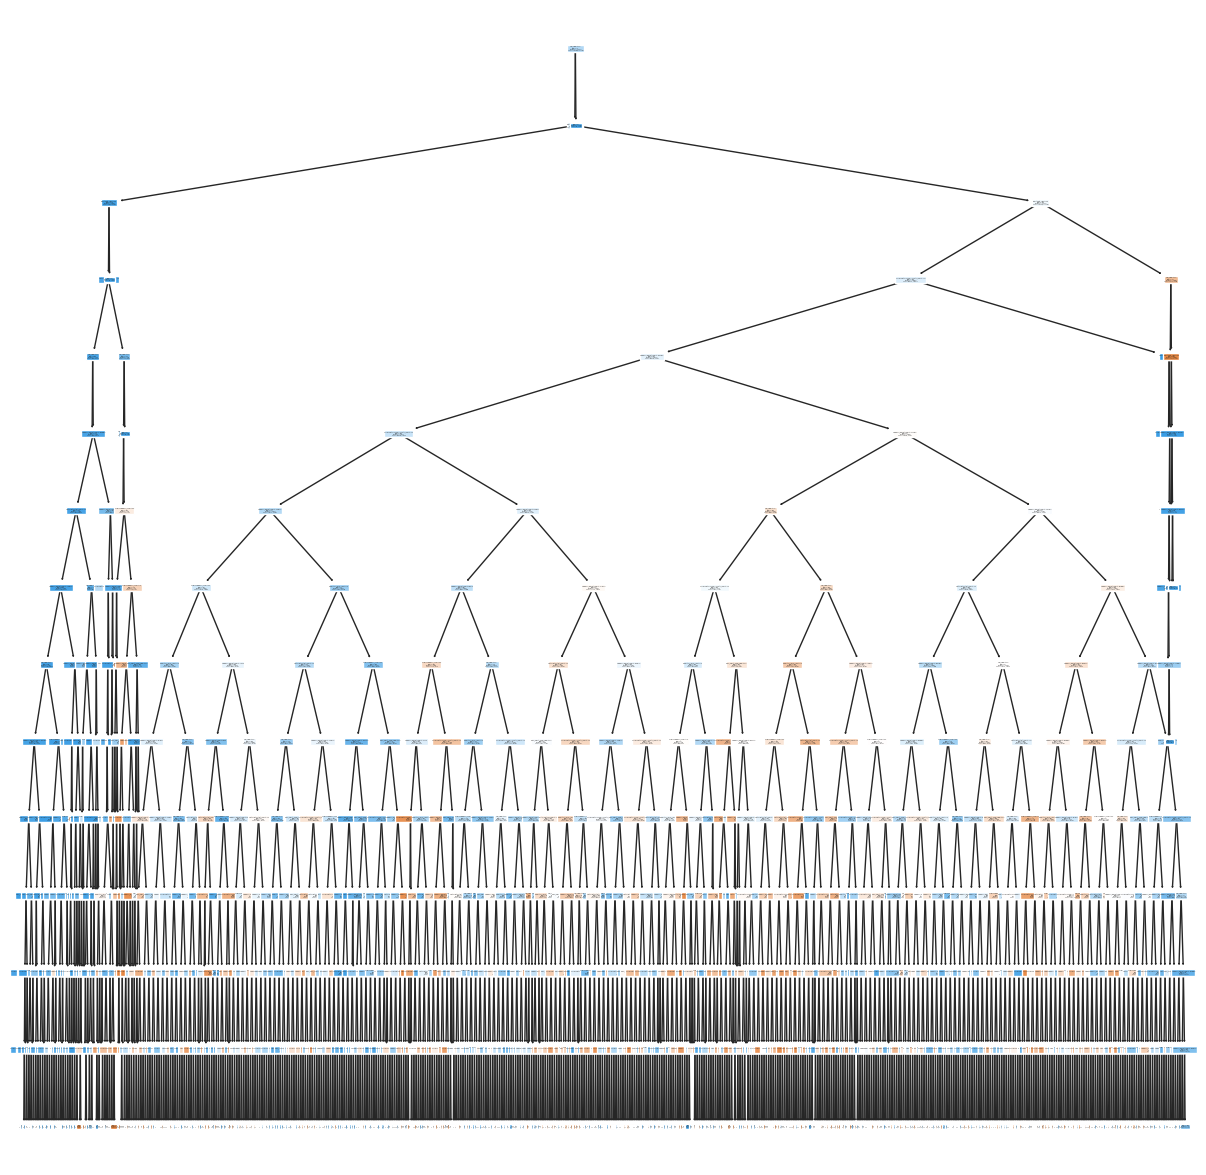

In [155]:
arbol = DecisionTreeClassifier(max_depth=14, random_state=42)
arbol.fit(X_train, y_train)
plt.figure(figsize= (15, 15))
tree.plot_tree(arbol, filled=True, feature_names=X.columns)
plt.show()

Podemos observar que es un árbol bastante complejo, pero en términos de precisión es bastante aceptable.

<function matplotlib.pyplot.show(close=None, block=None)>

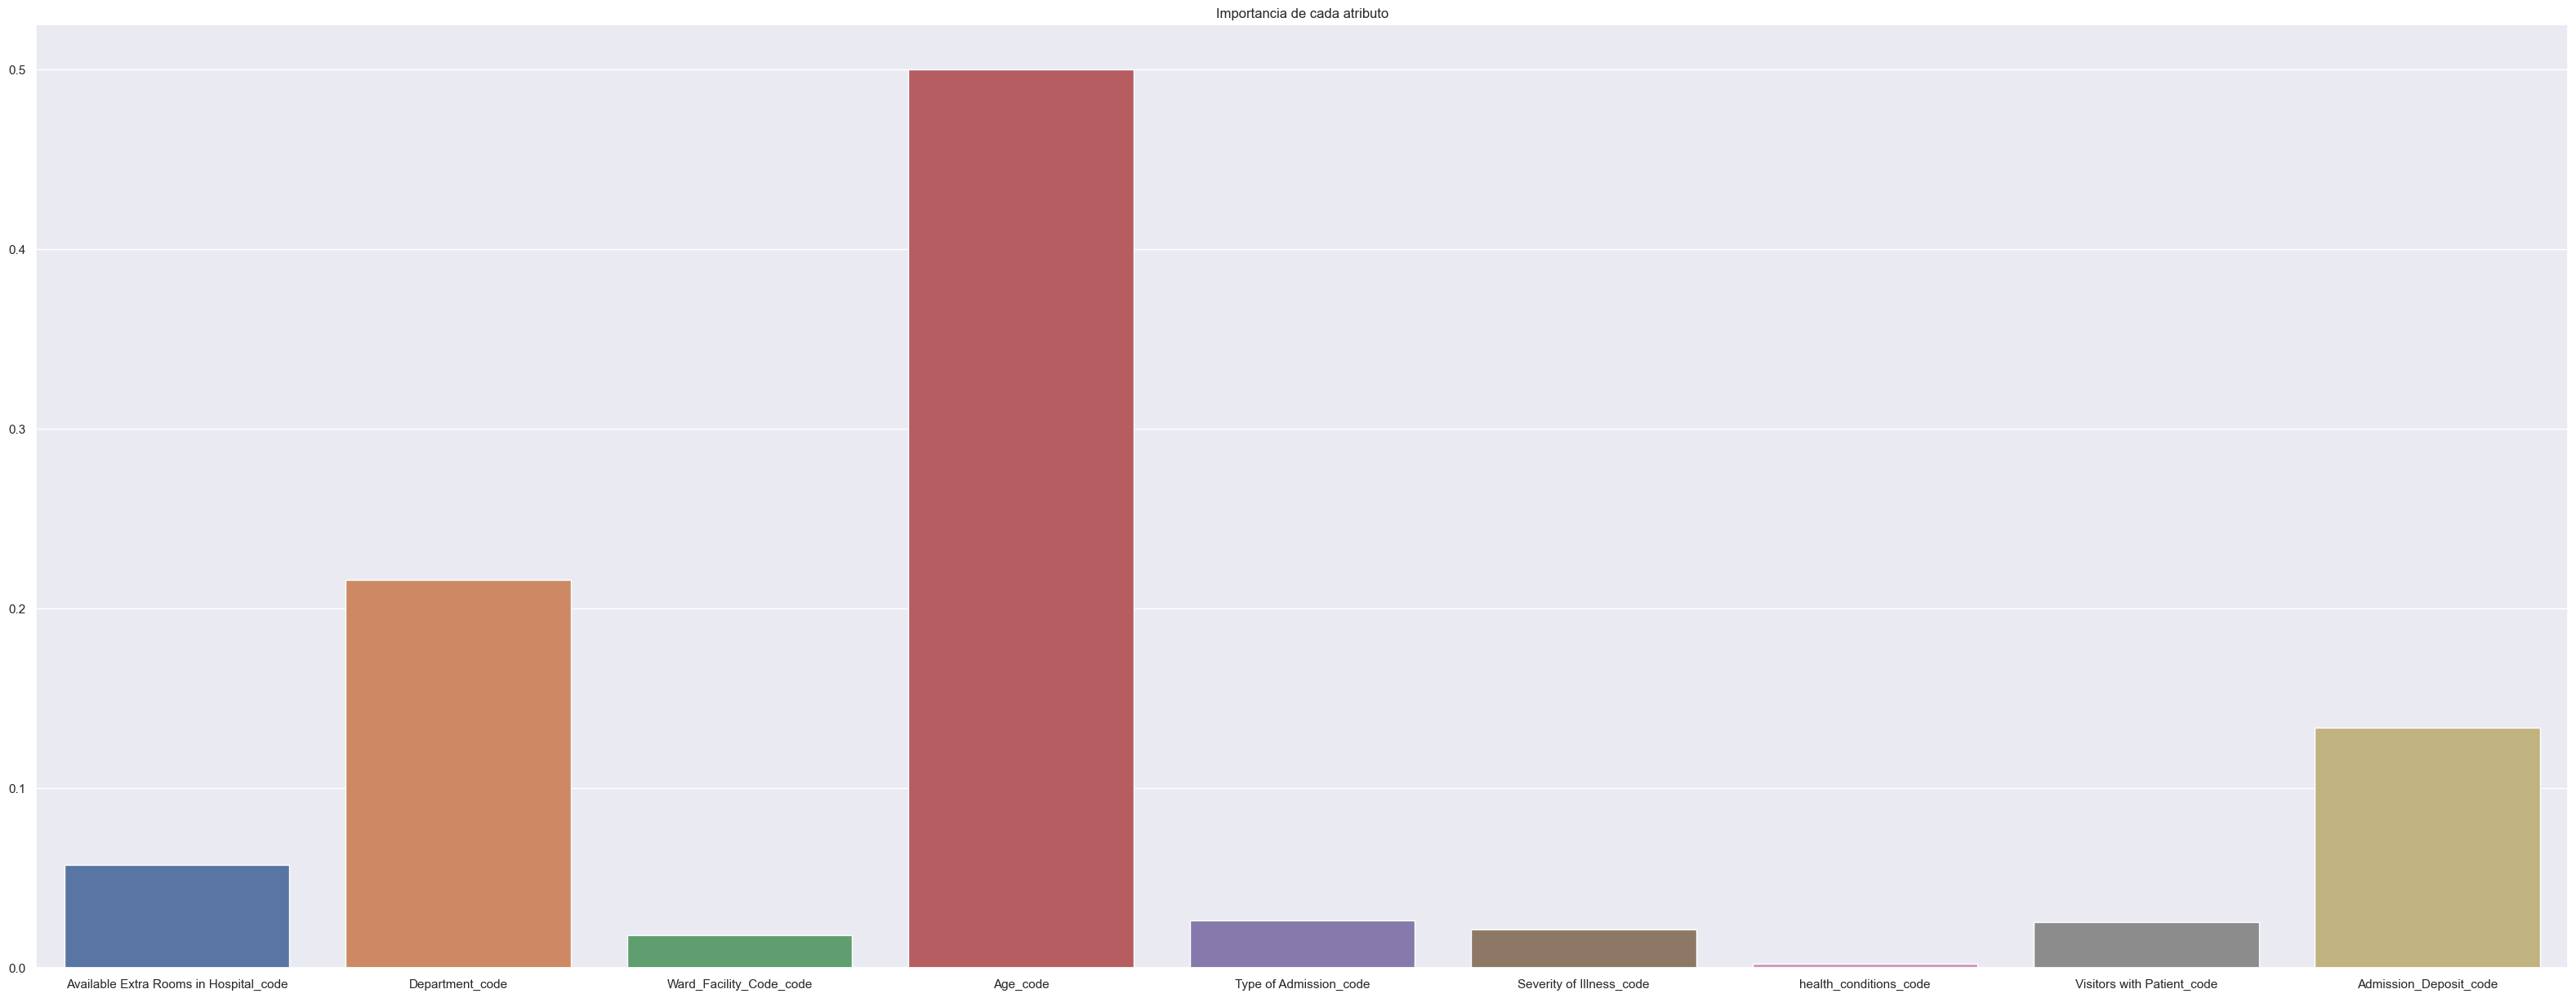

In [156]:
importancias = arbol.feature_importances_
columnas = X.columns


# creamos el gráfico
sns.set(rc={'figure.figsize':(40,15)})
sns.barplot(x=columnas, y=importancias)
plt.title('Importancia de cada atributo')
plt.show

Observamos cuáles son las columnas que más importancia tienen dentro del modelo y podemos ver que la edad es la más determinante para la estadía total del paciente, seguida por el departamento en el que se encuentra, y en tercer lugar, el monto que haya sido depositado para cubrir los gastos iniciales de la estadía del paciente.

Vamos a repetir el procedimiento pero ahora con el archivo de testeo.

In [162]:
X_2 = pd.read_csv('C:/Users/AMD\Desktop/Proyectos_individuales/DATA05PI02/datasets/hospitalizaciones_test.csv')

In [163]:
X_2.drop(columns=['patientid'], inplace=True)

for column in X_2.columns:
    X_2[column] = pd.Categorical(X_2[column])
    X_2[f'{column}_code'] = X_2[column].cat.codes

X_2.drop(columns=['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'Age', 'gender', 'Type of Admission',
       'Severity of Illness', 'health_conditions', 'Visitors with Patient',
       'Insurance', 'Admission_Deposit'], inplace=True)

X_2.drop(columns=['staff_available_code', 'Insurance_code', 'doctor_name_code', 'staff_available_code',
'gender_code', 'Insurance_code'], inplace=True)

Y_2_pred = arbol.predict(X_2)

Y_2_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [164]:
Y_2_pred = pd.DataFrame(Y_2_pred)

Y_2_pred

,0
0,1
1,1
2,1
3,0
4,1
...,...
89995,0
89996,1
89997,1
89998,1


Renombramos la columna por pred, y al guardar eliminamos el índice.

In [168]:
Y_2_pred = Y_2_pred.rename(columns={0:'pred'})
Y_2_pred.to_csv('LucianoAsencio.csv', index=False)